# Import Dependencies

In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from plotly import express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Read Dataset

In [133]:
cardioDf = pd.read_csv('source/cardio.csv', sep=';')
df = cardioDf.copy()

# Get Information About Dataset

## Preinfo

In [3]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe().T

count          mean           std      min       25%      50%  \
id           70000.0  49972.419900  28851.302323      0.0  25006.75  50001.5   
age          70000.0  19468.865814   2467.251667  10798.0  17664.00  19703.0   
gender       70000.0      1.349571      0.476838      1.0      1.00      1.0   
height       70000.0    164.359229      8.210126     55.0    159.00    165.0   
weight       70000.0     74.205690     14.395757     10.0     65.00     72.0   
ap_hi        70000.0    128.817286    154.011419   -150.0    120.00    120.0   
ap_lo        70000.0     96.630414    188.472530    -70.0     80.00     80.0   
cholesterol  70000.0      1.366871      0.680250      1.0      1.00      1.0   
gluc         70000.0      1.226457      0.572270      1.0      1.00      1.0   
smoke        70000.0      0.088129      0.283484      0.0      0.00      0.0   
alco         70000.0      0.053771      0.225568      0.0      0.00      0.0   
active       70000.0      0.803729      0.397179      0.0      1.00      1.0   
cardio       70000.0      0.499700      0.500003      0.0      0.00      0.0   

                  75%      max  
id           74889.25  99999.0  
age          21327.00  23713.0  
gender           2.00      2.0  
height         170.00    250.0  
weight          82.00    200.0  
ap_hi          140.00  16020.0  
ap_lo           90.00  11000.0  
cholesterol      2.00      3.0  
gluc             1.00      3.0  
smoke            0.00      1.0  
alco             0.00      1.0  
active           1.00      1.0  
cardio           1.00      1.0

In [120]:
df["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

- 0: healthy
- 1: have cardiovascular heart disease

In [148]:
# add ages in year
df['years'] = round(df['age']/365)
df['years'] = pd.to_numeric(df['years'], downcast='integer')

Add an age column depends year not day base

## Nullity Analysis

In [149]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
years          0
dtype: int64

there is no null variable or columns we don't need to use dropna or fillna

1 - women, 2 - men. that means probably women have cv disease more than men.

# Outlier Analysis

Z-Score uses for:

- Detect values under avg or above avg
- Detecting outliers
- Standardization

## Age

In [150]:
# Calculate the z-scores
zAge = stats.zscore(df["age"])
zAge

array([-0.43606151,  0.30768633, -0.24799666, ..., -0.16328642,
        1.20058905,  0.43414373])

In [151]:
zAge.max()

1.7201992636724492

pretty normal to base on normal distribution

In [152]:
zAge.mean()

5.272227099339944e-16

## Height

In [153]:
zHeight = stats.zscore(df["height"])
zHeight

array([ 0.44345206, -1.01816804,  0.07804703, ...,  2.27047718,
       -0.16555632,  0.68705541])

In [154]:
zHeight.max()

10.431189405906348

normal distribution fall between -3 , +3

In [155]:
zHeight.mean()

1.450116217581256e-15

## Weight

In [156]:
zWeight = stats.zscore(df["weight"])
zWeight

array([-0.84787326,  0.74983117, -0.70894244, ...,  2.13913938,
       -0.15321916, -0.15321916])

In [157]:
zWeight.max()

8.738353346037593

In [158]:
zWeight.mean()

-2.905104728207724e-16

In [159]:
df.weight.mean()

74.20569

## Sistolic Pressure

In [160]:
zSistolic = stats.zscore(df["ap_hi"])
zSistolic

array([-0.12218198,  0.07261016,  0.00767945, ...,  0.33233302,
        0.04014481, -0.05725127])

In [161]:
zSistolic.max()

103.18258399326328

In [162]:
zSistolic.mean()

7.62310849365479e-17

z scores quite high lets draw

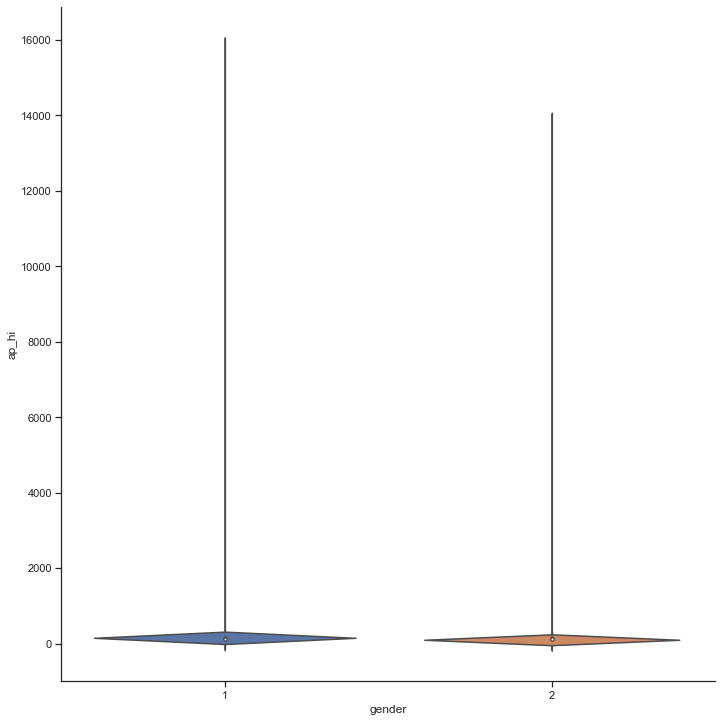

In [184]:
sns.catplot(x="gender", y="ap_hi", kind="violin", data=df, height=10);

In [164]:
df["ap_hi"].max()

16020

there is a mistake here because mean of ap_hi=128 std=150. that means this value is maybe incorrect maybe an outlier. check this 

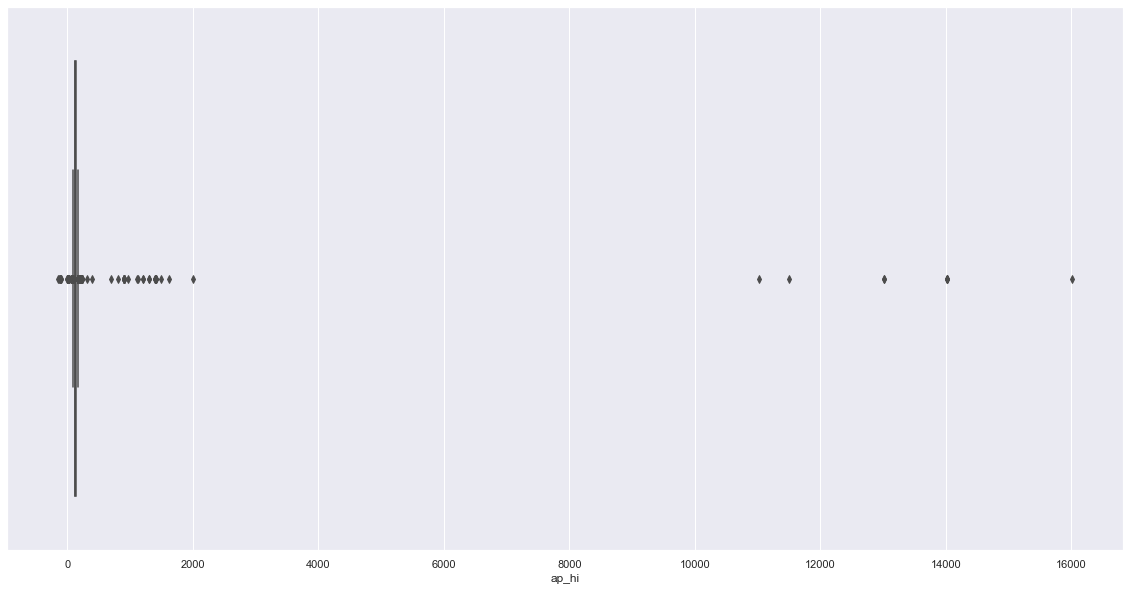

In [206]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=df, x=df.ap_hi);

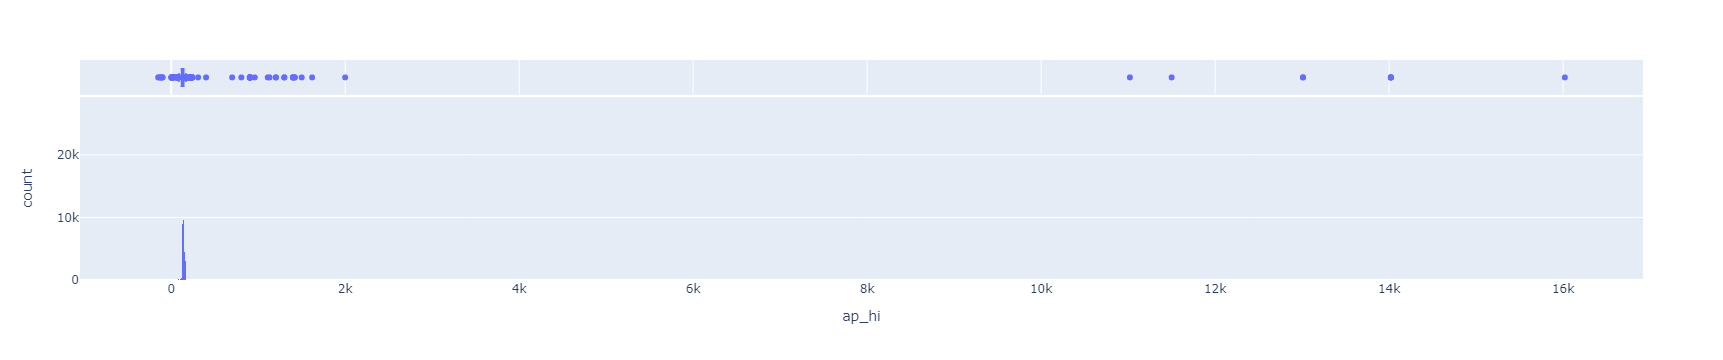

In [166]:
fig1 = px.histogram(df, x=df.ap_hi, marginal="box")
fig1.show()

## Diastolic Pressure

In [167]:
zDiastolic = stats.zscore(df["ap_hi"])
zDiastolic

array([-0.12218198,  0.07261016,  0.00767945, ...,  0.33233302,
        0.04014481, -0.05725127])

In [168]:
zDiastolic.max()

103.18258399326328

In [169]:
zDiastolic.mean()

7.62310849365479e-17

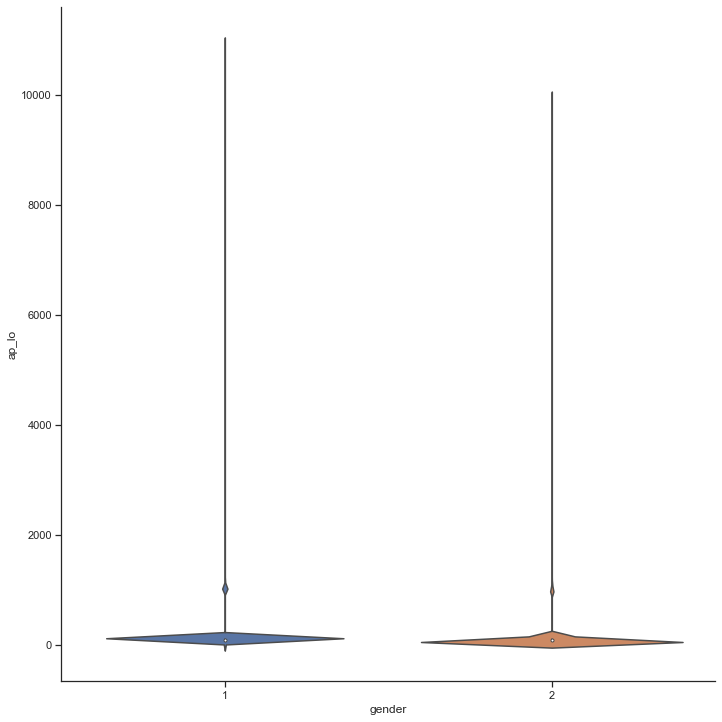

In [189]:
sns.catplot(x="gender", y="ap_lo", kind="violin", data=df, height=10);

In [171]:
df["ap_lo"].max()

11000

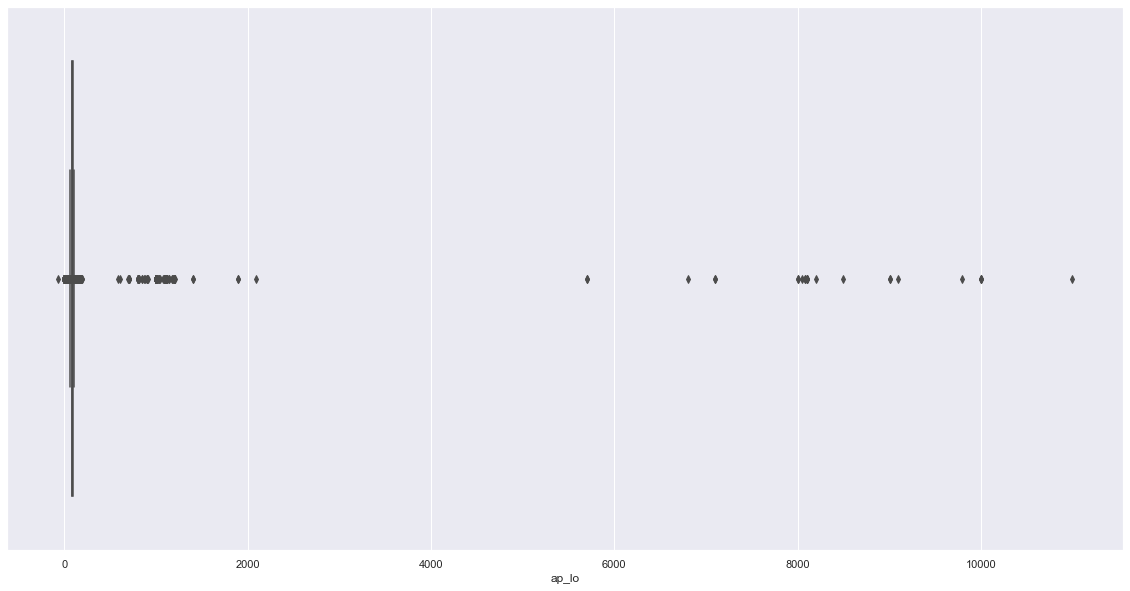

In [205]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=df, x=df.ap_lo);

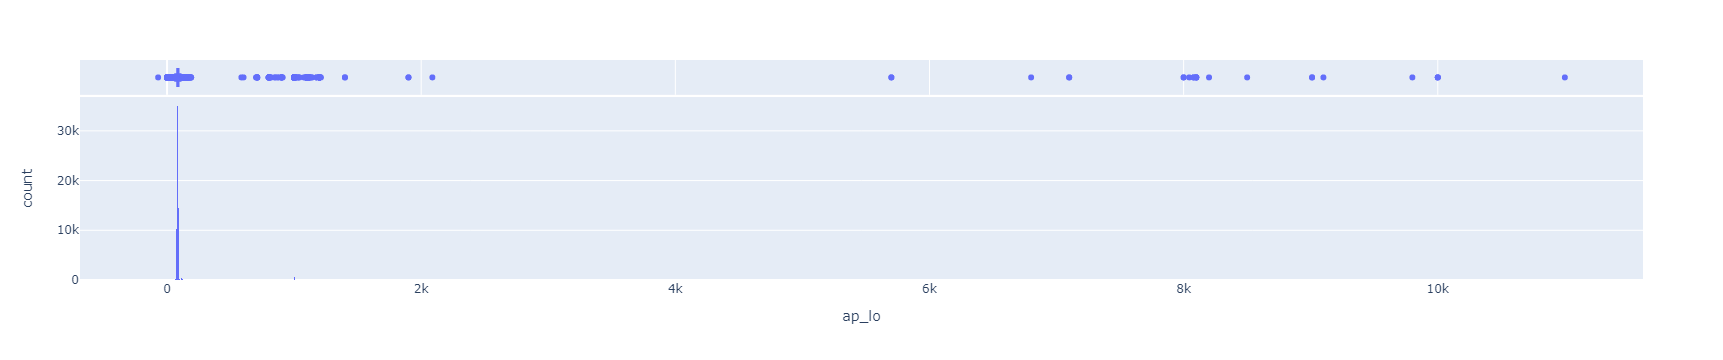

In [173]:
fig2 = px.histogram(df, x=df.ap_lo, marginal="box")
fig2.show()

## Apply On Hole Dataset

In [174]:
zScore = stats.zscore(df)
zScore

array([[-1.73208045, -0.43606151,  1.36405487, ...,  0.49416711,
        -0.99940018, -0.49350546],
       [-1.73204579,  0.30768633, -0.73310834, ...,  0.49416711,
         1.00060018,  0.24556599],
       [-1.73201113, -0.24799666, -0.73310834, ..., -2.02360695,
         1.00060018, -0.19787688],
       ...,
       [ 1.7338537 , -0.16328642,  1.36405487, ..., -2.02360695,
         1.00060018, -0.19787688],
       [ 1.73392303,  1.20058905, -0.73310834, ..., -2.02360695,
         1.00060018,  1.13245175],
       [ 1.73395769,  0.43414373, -0.73310834, ...,  0.49416711,
        -0.99940018,  0.39338029]])

In [175]:
zScore.mean()

9.922221774364256e-17

In [176]:
zScore.max()

103.18258399326328

count of outlier variables by column

In [177]:
sum(zScore <-3)

array([  0,   4,   0, 152,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         4])

In [178]:
sum(zScore >3)

array([   0,    0,    0,  141,  691,   38,  951,    0, 5331, 6169, 3764,
          0,    0,    0])

In [179]:
zScore = abs(zScore)

In [180]:
zScore

array([[1.73208045, 0.43606151, 1.36405487, ..., 0.49416711, 0.99940018,
        0.49350546],
       [1.73204579, 0.30768633, 0.73310834, ..., 0.49416711, 1.00060018,
        0.24556599],
       [1.73201113, 0.24799666, 0.73310834, ..., 2.02360695, 1.00060018,
        0.19787688],
       ...,
       [1.7338537 , 0.16328642, 1.36405487, ..., 2.02360695, 1.00060018,
        0.19787688],
       [1.73392303, 1.20058905, 0.73310834, ..., 2.02360695, 1.00060018,
        1.13245175],
       [1.73395769, 0.43414373, 0.73310834, ..., 0.49416711, 0.99940018,
        0.39338029]])

# Visualization

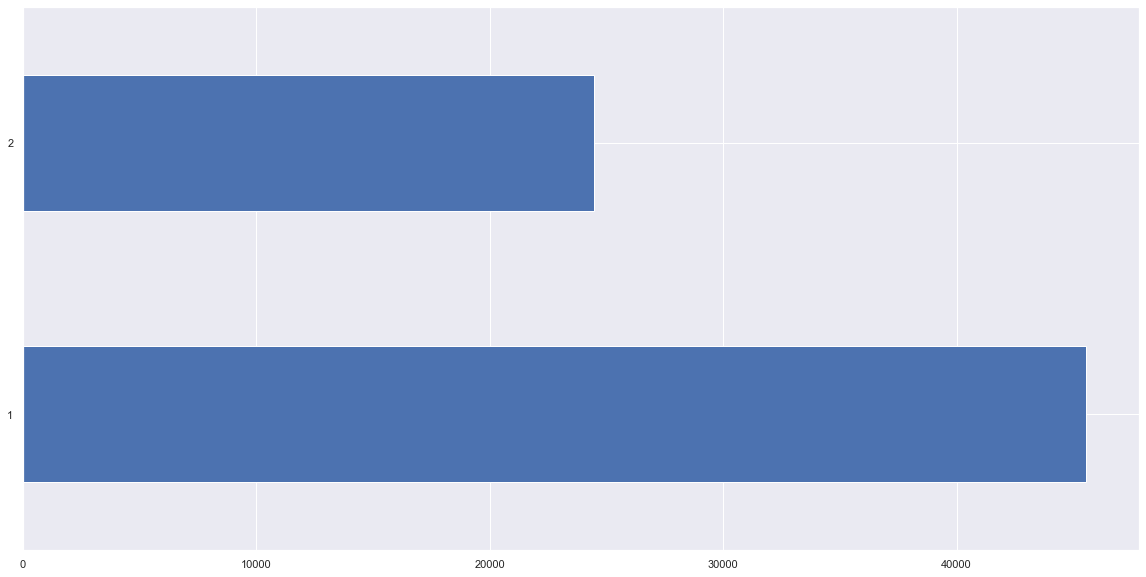

In [204]:
# distribution of cv disease on gender
(df["gender"]
 .value_counts()
 .plot.barh());

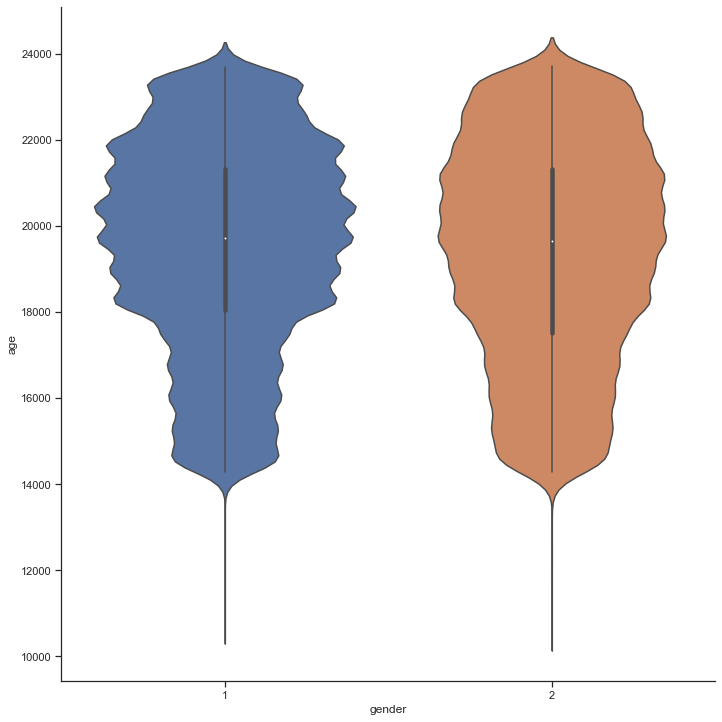

In [182]:
sns.catplot(x="gender", y="age", kind="violin", data=df, height=10);

age in day group by gender visualization by violin graph 

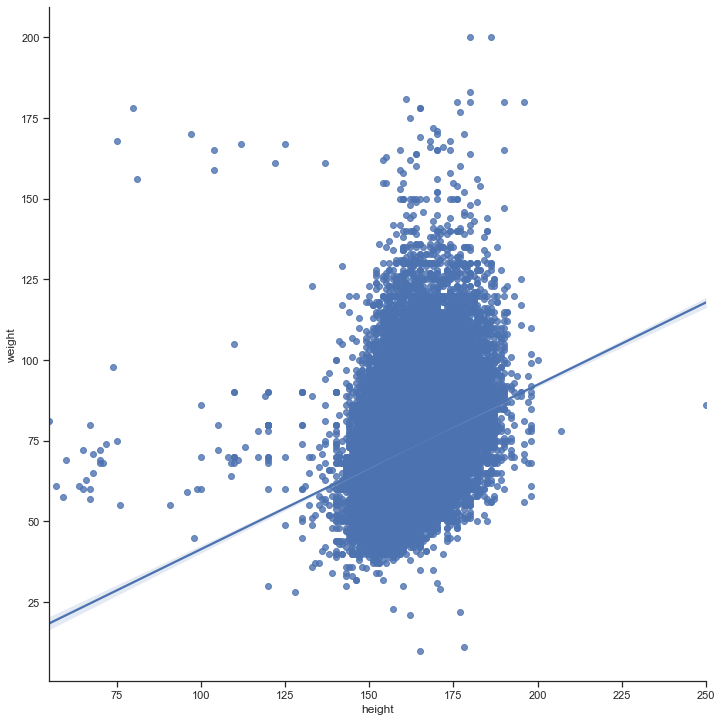

In [183]:
sns.lmplot(data=df, x="height", y="weight", height=10);

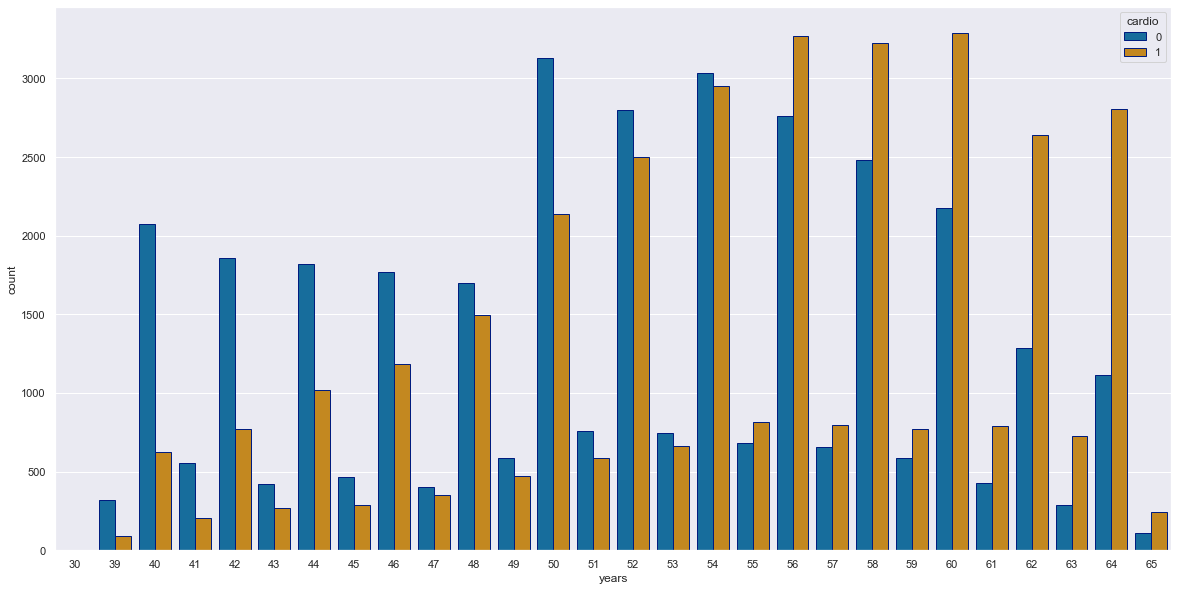

In [200]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='years', hue='cardio', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1));

# Correlation Heatmap

In [207]:
df.corr()

id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.006570 -0.016867 -0.000033   
cardio       0.003799  0.238159  0.008109 -0.010821  0.181660  0.054475   
years        0.003050  0.999090 -0.023017 -0.081456  0.053661  0.020793   

                ap_lo  cholesterol      gluc     smoke      alco    active  \
id          -0.002529     0.006106  0.002467 -0.003699  0.001210  0.003755   
age          0.017647     0.154424  0.098703 -0.047633 -0.029723 -0.009927   
gender       0.015254    -0.035821 -0.020491  0.338135  0.170966  0.005866   
height       0.006150    -0.050226 -0.018595  0.187989  0.094419 -0.006570   
weight       0.043710     0.141768  0.106857  0.067780  0.067113 -0.016867   
ap_hi        0.016086     0.023778  0.011841 -0.000922  0.001408 -0.000033   
ap_lo        1.000000     0.024019  0.010806  0.005186  0.010601  0.004780   
cholesterol  0.024019     1.000000  0.451578  0.010354  0.035760  0.009911   
gluc         0.010806     0.451578  1.000000 -0.004756  0.011246 -0.006770   
smoke        0.005186     0.010354 -0.004756  1.000000  0.340094  0.025858   
alco         0.010601     0.035760  0.011246  0.340094  1.000000  0.025476   
active       0.004780     0.009911 -0.006770  0.025858  0.025476  1.000000   
cardio       0.065719     0.221147  0.089307 -0.015486 -0.007330 -0.035653   
years        0.017754     0.154386  0.098596 -0.047884 -0.029918 -0.009819   

               cardio     years  
id           0.003799  0.003050  
age          0.238159  0.999090  
gender       0.008109 -0.023017  
height      -0.010821 -0.081456  
weight       0.181660  0.053661  
ap_hi        0.054475  0.020793  
ap_lo        0.065719  0.017754  
cholesterol  0.221147  0.154386  
gluc         0.089307  0.098596  
smoke       -0.015486 -0.047884  
alco        -0.007330 -0.029918  
active      -0.035653 -0.009819  
cardio       1.000000  0.237749  
years        0.237749  1.000000

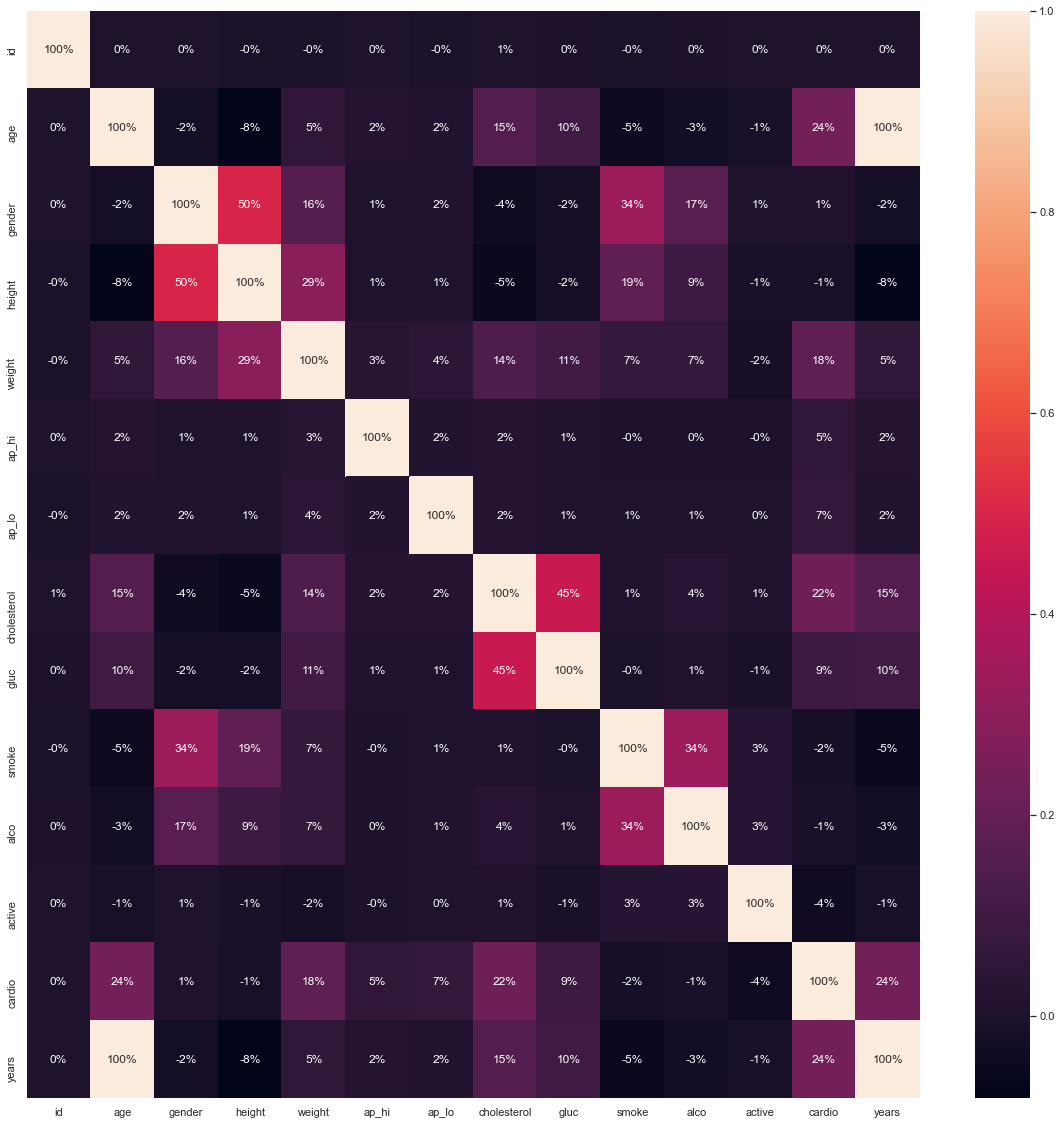

In [209]:
# visualize correlation
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(), annot=True, fmt='.0%');

In [213]:
# drop unnecessary columns
df = df.drop("id", axis=1)

In [214]:
df = df.drop("years", axis=1)

In [215]:
df.head(3)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1

# Splitting Data

In [218]:
# split data into feature and target
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [220]:
# split data into %25 testing, %75 training data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# Scaling

feature scaling : scale values into values between 0-1

In [225]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# Random Forest Classifier

In [226]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1, n_jobs=-1, verbose=2)
rf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 10building tree 2 of 10building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1,
                       random_state=1, verbose=2)

In [227]:
# training model accuracy
rf.score(x_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


0.979904761904762

In [230]:
# test model accuracy
cm = confusion_matrix(y_test, rf.predict(x_test))

tn = cm[0][0] # true negative
tp = cm[1][1] # true positive
fn = cm[1][0] # false negative
fp = cm[0][1] # false positive

print(cm)

# model accuracy on test data
print("Model Test Accuracy : {}".format((tp+tn)/(tp+tn+fn+fp)))

[[6589 2020]
 [3349 5542]]
Model Test Accuracy : 0.6932


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


mta: means if you run this model on your patient health data you will get true answer 69 percent accurate